In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score

In [4]:
# Upload the CSV file to Google Colab
from google.colab import files
uploaded = files.upload()

# Read the CSV file into a DataFrame
df = pd.read_csv("Creditcard_data.csv")

# Display the DataFrame
print(df)


Saving Creditcard_data.csv to Creditcard_data (1).csv
     Time        V1        V2        V3        V4        V5        V6  \
0       0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1       0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..    ...       ...       ...       ...       ...       ...       ...   
767   575 -0.572263  0.731748  1.541254  0.150506  1.108974  0.372152   
768   579 -1.296845 -0.511605  2.404726 -0.310762 -0.319551 -0.542842   
769   579  1.214170  0.210481  0.484651  0.479768 -0.261955 -0.527039   
770   580  1.267030 -0.071114  0.037680  0.512683  0.242392  0.705212   
771   581  1.153758  0.132273  0.382969  1.405063 -0.224287 -0.197295   

           V7        V8        V9  ...       V21       V22       V23 

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


<Axes: xlabel='Class', ylabel='count'>

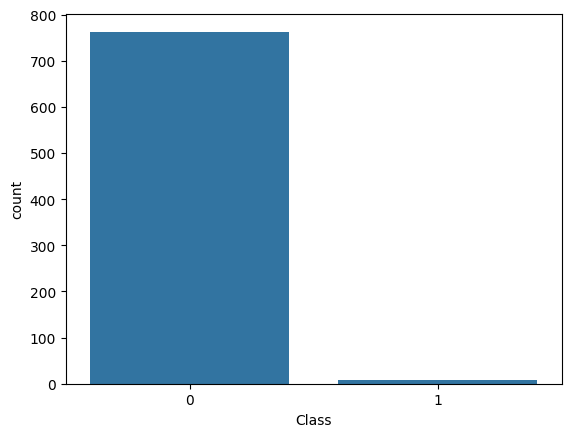

In [8]:
sns.countplot(data= df, x= 'Class')

In [9]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

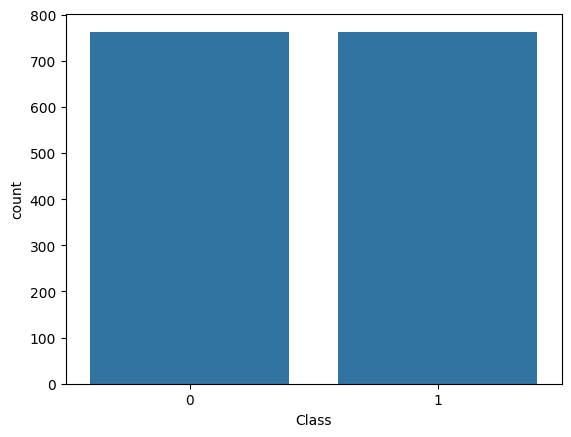

In [10]:
X= df.drop('Class',axis=1)
y= df['Class']

ros= RandomOverSampler(random_state=42)                    # balancing the dataset through oversampling

X_resampled, y_resampled= ros.fit_resample(X,y)

resampled_df= pd.concat([pd.DataFrame(X_resampled,columns= X.columns), pd.Series(y_resampled,name= 'Class')], axis=1)

sns.countplot(data= resampled_df, x= 'Class')

In [11]:
resampled_df['Class'].value_counts()

0    763
1    763
Name: Class, dtype: int64

# **Applying Different Sampling Methods**

Simple Random Sampling

In [12]:
# z score
z= 1.96                 # assuming confidence value of 0.95

# estimated proportion of the population with the characteristic of interest
p= 0.5                  # using proportion of smaller class as estimate, i.e. 763/(763+763)

# margin of error
E= 0.05                 # 1 - (confidence value)

In [13]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E**2)))
sample_size

384

In [14]:
random_sample= resampled_df.sample(n= sample_size, replace= False).reset_index(drop= True)

In [15]:
random_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
1,292,-0.401849,1.015111,1.302010,-0.042208,0.055806,-0.683093,0.561144,0.106408,-0.570880,...,-0.215930,-0.623168,-0.013880,0.262950,-0.207349,0.056362,0.237041,0.087456,4.45,0
2,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
3,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
4,484,-0.928088,0.398194,1.741131,0.182673,0.966387,-0.901004,0.879016,-0.156590,-0.142117,...,0.066353,0.281378,-0.257966,0.385384,0.391117,-0.453853,-0.104448,-0.125765,1.00,1


Systematic Sampling

In [16]:
# no. of elements after which an element is selected
k= 5
#k= int(np.sqrt(len(resampled_df)))

In [17]:
sample_size= len(resampled_df)//k
sample_size

305

In [18]:
indices= np.arange(0,len(resampled_df),k)[:sample_size]
systematic_sample= resampled_df.loc[indices].reset_index(drop= True)

In [19]:
systematic_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0
3,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0
4,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0


Stratified Sampling

In [20]:
# z score
z= 1.96                 # assuming confidence value of 0.95

# estimated proportion of the population with the characteristic of interest
p= 0.5                  # using proportion of smaller class as estimate, i.e. 763/(763+763)

# margin of error
E= 0.05                 # 1 - (confidence value)

# number of strata
S= 2                    # no. of classes

In [21]:
sample_size= int(np.round((z**2 * p * (1-p)) / (E/S)**2))
sample_size

1537

In [23]:
len(resampled_df)

1526

In [24]:
#sample_size*100/len(resampled_df)

In [25]:
stratified_sample= resampled_df.groupby(by= 'Class', group_keys= False).apply(lambda x: x.sample(n= sample_size//2, replace= True)).reset_index(drop= True)

In [26]:
stratified_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,558,-0.439880,0.630451,1.942591,-0.798747,0.261325,-0.617939,1.224288,-0.844641,0.211259,...,-0.085056,0.177107,-0.142910,0.466897,-0.438533,0.803909,-0.907362,-0.614642,17.68,0
1,278,-1.092301,0.430750,1.249785,0.429757,1.272076,0.548203,-0.120592,0.452571,-0.414005,...,-0.078916,0.072870,0.126237,-0.648165,-1.049104,0.206696,0.411803,0.188800,2.69,0
2,171,-0.365532,1.006932,1.108304,-0.428694,0.590513,0.105474,0.602926,0.132310,-0.636398,...,-0.250031,-0.663325,-0.189399,-0.845682,-0.055760,0.124845,0.263525,0.099579,0.89,0
3,449,-0.856525,0.583290,1.389014,-0.344699,0.267594,-0.951375,0.523117,-0.049229,-0.076944,...,-0.056911,-0.309940,0.167010,0.359246,-0.969651,-0.185793,-0.136897,0.233672,10.20,0
4,95,1.195572,0.258858,0.635796,0.641257,-0.395081,-0.694667,0.034086,-0.124346,-0.078400,...,-0.201249,-0.516925,0.199096,0.412552,0.122984,0.101940,-0.007846,0.020214,1.29,0


We can perform stratified sampling by another simpler approach while also creating a test set on which we will compute the accuracy score of each model.

In [27]:
train_stratified_sample, test_stratified_sample= train_test_split(resampled_df, test_size= 0.3, stratify= resampled_df['Class'])

In [28]:
train_stratified_sample= train_stratified_sample.reset_index(drop= True)
test_stratified_sample= test_stratified_sample.reset_index(drop= True)

In [29]:
train_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1,123,0.968784,-0.501798,-1.333558,0.388804,2.036091,3.661714,-0.236795,0.809586,0.154501,...,-0.091052,-0.561280,-0.260983,1.017700,0.837225,-0.342889,-0.003467,0.039004,160.86,0
2,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
3,356,1.586093,-1.169091,-1.350477,-2.504580,1.106389,3.135282,-1.351529,0.690932,-2.090697,...,-0.200366,-0.325402,-0.071104,0.996898,0.681093,-0.100190,0.022118,0.009259,15.00,0
4,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,512,-0.656147,0.501881,1.532601,-1.319886,-0.186189,-0.897731,1.191646,-0.191943,-0.211756,...,-0.130362,-0.374358,0.112819,0.526267,-0.406443,0.597938,0.046437,-0.055101,80.00,0
1064,168,1.274967,-0.778783,1.162453,-0.180425,-1.532631,-0.101808,-1.185738,0.076522,-0.265080,...,-0.154061,0.003713,-0.040272,-0.103367,0.129752,0.605919,0.032167,0.036730,42.90,0
1065,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1066,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1


In [30]:
test_stratified_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
1,525,1.089846,-0.602780,0.924389,-0.077038,-1.275907,-0.420567,-0.634844,0.118674,0.838481,...,0.112488,0.364386,-0.087886,0.644572,0.192433,1.421352,-0.084481,0.003383,59.90,0
2,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
3,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
4,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
454,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
455,282,-0.426030,1.041184,1.063793,-0.407921,0.077615,-0.810862,0.620734,-1.048589,-0.416712,...,0.758834,-0.107204,-0.139569,0.500355,0.165607,1.052250,-0.024388,0.008398,2.00,0
456,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1


In [31]:
X_test= test_stratified_sample.drop('Class',axis=1)
y_test= test_stratified_sample['Class']

Cluster Sampling

In [32]:
# # z score
# z= 1.96                 # assuming confidence value of 0.95

# # estimated proportion of the population with the characteristic of interest
# p= 0.5                  # using proportion of smaller class as estimate, i.e. 763/(763+763)

# # margin of error
# E= 0.05                 # 1 - (confidence value)

# # average size of clusters
# C= 50

In [33]:
# sample_size= int(np.round((z**2 * p * (1-p)) / (E/C)**2))
# sample_size

In [34]:
clusters= [0,1]
sample_size= 500
cluster_sample= pd.DataFrame()

for cluster in clusters:
    cluster_df= resampled_df[resampled_df['Class']==cluster]
    sample= cluster_df.sample(n= sample_size)
    cluster_sample= pd.concat([cluster_sample,sample])

In [35]:
cluster_sample= cluster_sample.reset_index(drop= True)

In [36]:
cluster_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,430,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.00,0
1,246,-1.069200,1.239963,0.545157,1.005354,-0.025696,-0.910673,0.422442,0.049283,-0.564601,...,0.146555,0.602990,0.132656,0.427113,-0.084030,-0.417194,-0.897885,-0.462042,2.98,0
2,184,1.199278,0.365738,0.428155,0.617733,-0.342610,-0.845869,0.041919,-0.114617,-0.360600,...,-0.213355,-0.615517,0.132391,0.517045,0.185487,0.061686,-0.021504,0.024434,1.98,0
3,95,1.057021,-0.646956,0.729167,-0.569262,-1.174307,-0.527625,-0.471677,0.051744,1.904018,...,0.186184,0.743093,-0.163619,0.453570,0.615479,-0.508562,0.089553,0.037617,69.00,0
4,341,-0.268621,-0.233374,1.025263,-2.129325,1.566375,3.863064,-0.732265,0.807716,-1.230053,...,0.343692,0.921648,-0.410791,1.052995,0.398555,0.070685,-0.070437,-0.148873,22.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
996,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
997,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
998,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1


Bootstrap Sampling

In [37]:
num_bootstrap_samples = 1

for _ in range(num_bootstrap_samples):
    # Generate a bootstrap sample by sampling with replacement from the resampled dataset
    bootstrap_sample = resampled_df.sample(n=len(resampled_df), replace=True)

In [38]:
bootstrap_sample= bootstrap_sample.reset_index(drop= True)

In [39]:
bootstrap_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1
1,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
2,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
3,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4,118,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,2.69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1522,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1523,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1524,352,-1.046362,0.720386,1.603413,0.608371,0.460941,-1.423406,0.266079,-0.141048,-0.516793,...,-0.231027,-0.529575,-0.106293,0.704604,-0.349903,0.146041,0.289965,0.159572,2.67,0


Training on Different Models

In [40]:
lr_model= LogisticRegression(max_iter= 10000, solver= 'sag')
knn_model= KNeighborsClassifier(n_neighbors= 3)
rf_model= RandomForestClassifier()
dt_model= DecisionTreeClassifier()
nb_model= GaussianNB()

In [41]:
models= [lr_model,knn_model,rf_model,dt_model,nb_model]
model_names= ['Linear Regression','KNN','Random Forest','Decision Tree','Naive Bayes']

In [42]:
samples= [random_sample, systematic_sample, train_stratified_sample, cluster_sample, bootstrap_sample]
sample_names= ['Simple Random Sample', 'Systematic Sample', 'Stratified Sample', 'Cluster Sample', 'Bootstrap Sample']

In [43]:
test_samples= []

In [44]:
for sample in samples:
    scaler= StandardScaler()
    X_train= scaler.fit_transform(sample.drop('Class',axis=1))
    X_train= pd.DataFrame(X_train, columns= df.columns[:-1])
    sample= pd.concat([X_train,sample['Class']],axis=1)
    X_test= scaler.fit_transform(X_test)
    X_test= pd.DataFrame(X_test, columns= df.columns[:-1])
    test_samples.append(X_test)

In [45]:
accuracy_table= pd.DataFrame(index= model_names, columns= sample_names)

for i,model in enumerate(models):
    for j,sample in enumerate(samples):
        model.fit(sample.drop('Class',axis=1), sample['Class'])
        pred= model.predict(test_samples[j])
        accuracy_table.loc[model_names[i], sample_names[j]]= accuracy_score(y_test, pred)

In [46]:
accuracy_table

,Simple Random Sample,Systematic Sample,Stratified Sample,Cluster Sample,Bootstrap Sample
Linear Regression,0.842795,0.68559,0.70524,0.696507,0.79476
KNN,0.5,0.5,0.502183,0.502183,0.41048
Random Forest,0.5,0.5,0.5,0.5,0.5
Decision Tree,0.480349,0.539301,0.497817,0.622271,0.620087
Naive Bayes,0.620087,0.561135,0.620087,0.617904,0.617904
